C:\Users\User\Anaconda3\envs\tfe\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
C:\Users\User\Anaconda3\envs\tfe\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.


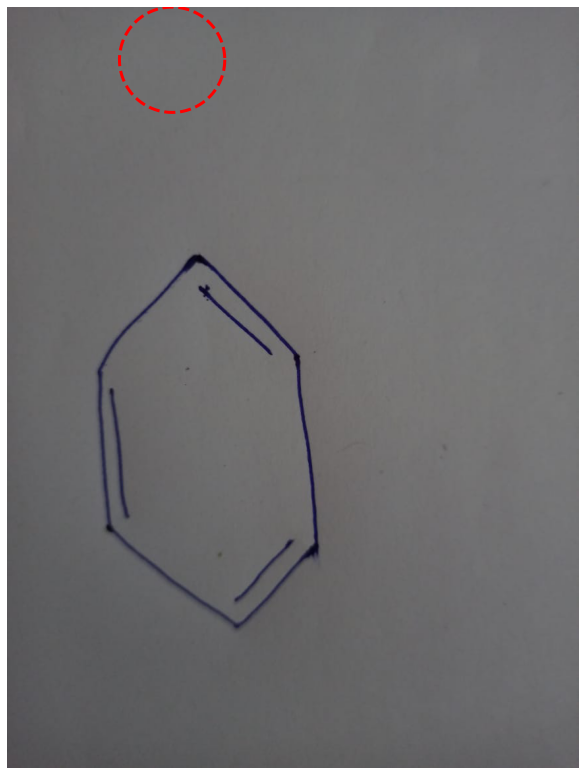

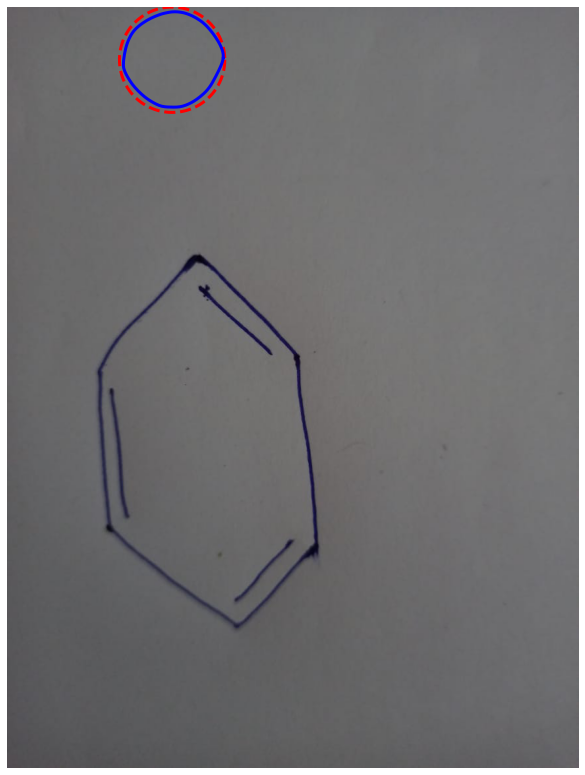

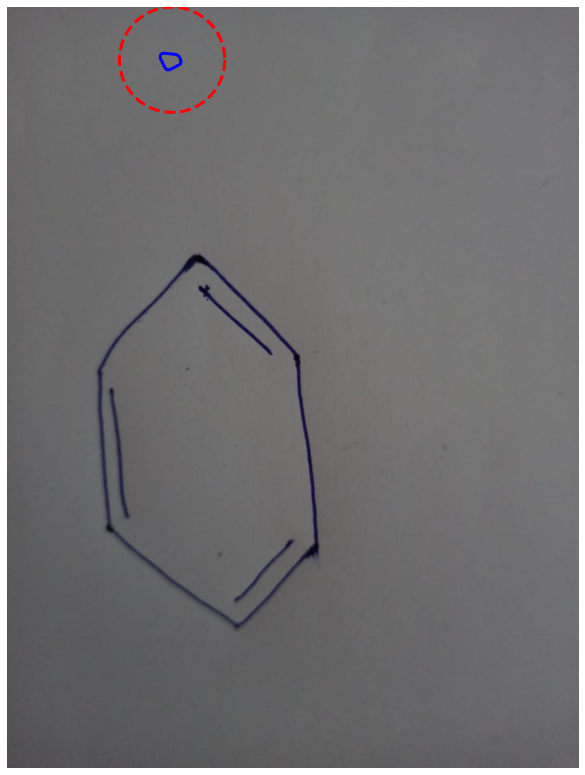

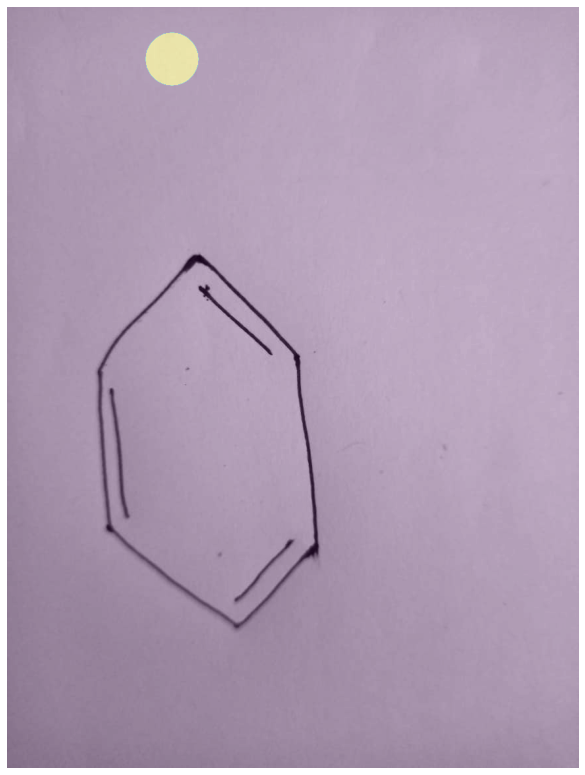

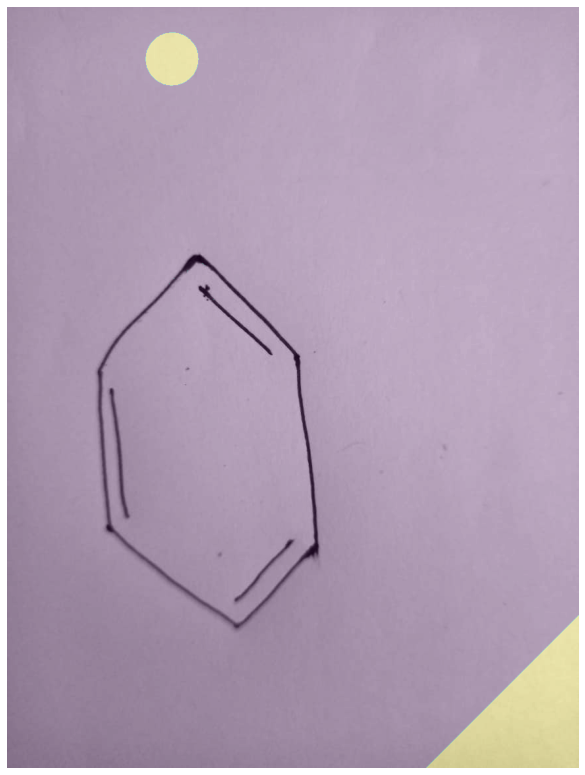

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import io

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

image = io.imread('basedata/train/benzene/v2.jpeg') 


image_gray = color.rgb2gray(image) 


def circle_points(resolution, center, radius):
     
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

points = circle_points(200, [80, 250], 80)[:-1]

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

indices = draw.circle_perimeter(80, 250,20)#from here
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2


image_segmented = seg.random_walker(image_gray, image_labels)

fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3)

image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)

fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3)